In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import os, sys
import torch

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.utils import train_utils, config, data_utils
from src import dataset, data_fitter, beta_explorer
import line_simple_data
line_simple_data.root_dir = "../data/line_simple_dataset"

Arms shape:  (2016, 4) [0 0 0 0] [11  2  6  7]


# Ablation on sampling from corrected vs uncalibrated dataset

In [9]:
dev = torch.device("cpu")

line_dataset, line_data_fitter = line_simple_data.prepare()
explorer = beta_explorer.BetaExplorer(line_dataset, line_data_fitter, line_data_fitter.cache_dir, dev,
                                      explore_strategy='variance')

calibrated_perfs, uncalibrated_perfs = [], []
for num_sample in [500, 2000, 5000, 10000]:
    err_3, err_5, err_10 = explorer.brute_predictor(num_sample, corrected=False)
    uncalibrated_perfs.append((num_sample, err_3, err_5, err_10))
    err_3, err_5, err_10 = explorer.brute_predictor(num_sample, corrected=True)
    calibrated_perfs.append((num_sample, err_3, err_5, err_10))
    
print (calibrated_perfs)

Loading label attribute models...
Done
Loding dataset...
Size fo available labeled data: 8732
Size of available unlabeled data: 40320
Setting models...
Initializing fitter...


Computing per arm accuracy
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9599
Acc quantiles: [0.   0.95 1.   1.   1.   1.   1.  ]
Worst arms: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.05
 0.05 0.05]
Worst arm idxs: [1991   31   30   29   28   27   26   25   24 1374 1373  701 1372 1371
  703  702  700 1375  696  697  698  699 1368  718 1370 1369 1709   40
 1706  716]
Worst arm attrs: [[11  2  3  7]
 [ 0  0  3  7]
 [ 0  0  3  6]
 [ 0  0  3  5]
 [ 0  0  3  4]
 [ 0  0  3  3]
 [ 0  0  3  2]
 [ 0  0  3  1]
 [ 0  0  3  0]
 [ 0  2  3  6]
 [ 0  2  3  5]
 [ 0  1  3  5]
 [ 0  2  3  4]
 [ 0  2  3  3]
 [ 0  1  3  7]
 [ 0  1  3  6]
 [ 0  1  3  4]
 [ 0  2  3  7]
 [ 0  1  3  0]
 [ 0  1  3  1]
 [ 0  1  3  2]
 [ 0  1  3  3]
 [ 0  2  3  0]
 [ 0  1  5  6]
 [ 0  2  3  2]
 [ 0  2  3  1]
 [ 6  2  3  5]
 [ 0  0  5  0]
 [ 6  2  3  2]
 [ 0  1  5  4]]
100%|██████████| 4/4 [00:12<00:00,  3.13s/it]
Empirical accuracy

Found 1940 for acc sigma: 0.030000 0.929896 0.989896
Found 154 for acc sigma: 0.050000 0.909896 1.009896
Found 127 for acc sigma: 0.100000 0.859896 1.059896
Brute force predictor perf.: 0.0665 0.4747 0.5604


100%|██████████| 4/4 [00:12<00:00,  3.08s/it]
Empirical accuracy: 0.9740
  0%|          | 0/16 [00:00<?, ?it/s]

Found 1940 for acc sigma: 0.030000 0.929896 0.989896
Found 154 for acc sigma: 0.050000 0.909896 1.009896
Found 127 for acc sigma: 0.100000 0.859896 1.059896
Brute force predictor perf.: 0.0549 0.4200 0.4913


100%|██████████| 16/16 [00:46<00:00,  2.93s/it]
Empirical accuracy: 0.9660
  0%|          | 0/16 [00:00<?, ?it/s]

Found 1940 for acc sigma: 0.030000 0.929896 0.989896
Found 154 for acc sigma: 0.050000 0.909896 1.009896
Found 127 for acc sigma: 0.100000 0.859896 1.059896
Brute force predictor perf.: 0.0657 0.4687 0.5445


100%|██████████| 16/16 [00:46<00:00,  2.92s/it]
Empirical accuracy: 0.9645
  0%|          | 0/40 [00:00<?, ?it/s]

Found 1940 for acc sigma: 0.030000 0.929896 0.989896
Found 154 for acc sigma: 0.050000 0.909896 1.009896
Found 127 for acc sigma: 0.100000 0.859896 1.059896
Brute force predictor perf.: 0.0584 0.4047 0.4697


100%|██████████| 40/40 [02:01<00:00,  3.05s/it]
Empirical accuracy: 0.9642
  0%|          | 0/40 [00:00<?, ?it/s]

Found 1940 for acc sigma: 0.030000 0.929896 0.989896
Found 154 for acc sigma: 0.050000 0.909896 1.009896
Found 127 for acc sigma: 0.100000 0.859896 1.059896
Brute force predictor perf.: 0.0571 0.4226 0.4829


100%|██████████| 40/40 [02:02<00:00,  3.06s/it]
Empirical accuracy: 0.9592
  0%|          | 0/79 [00:00<?, ?it/s]

Found 1940 for acc sigma: 0.030000 0.929896 0.989896
Found 154 for acc sigma: 0.050000 0.909896 1.009896
Found 127 for acc sigma: 0.100000 0.859896 1.059896
Brute force predictor perf.: 0.0422 0.2826 0.3201


100%|██████████| 79/79 [03:57<00:00,  3.01s/it]
Empirical accuracy: 0.9668
  0%|          | 0/79 [00:00<?, ?it/s]

Found 1940 for acc sigma: 0.030000 0.929896 0.989896
Found 154 for acc sigma: 0.050000 0.909896 1.009896
Found 127 for acc sigma: 0.100000 0.859896 1.059896
Brute force predictor perf.: 0.0576 0.4276 0.4949


100%|██████████| 79/79 [04:09<00:00,  3.15s/it]
Empirical accuracy: 0.9603


Found 1940 for acc sigma: 0.030000 0.929896 0.989896
Found 154 for acc sigma: 0.050000 0.909896 1.009896
Found 127 for acc sigma: 0.100000 0.859896 1.059896
Brute force predictor perf.: 0.0402 0.2463 0.2791
[(500, 0.054885482959194314, 0.4199536178107606, 0.49125084364454447), (2000, 0.05840086386499725, 0.4047212350083012, 0.4696647821585474), (5000, 0.04216628954416882, 0.2826080325501432, 0.32013667022582043), (10000, 0.04016952623623712, 0.24627414135660214, 0.27908551939998344)]


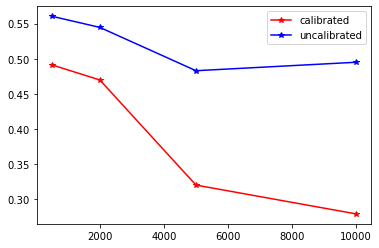

[(500, 0.054885482959194314, 0.4199536178107606, 0.49125084364454447), (2000, 0.05840086386499725, 0.4047212350083012, 0.4696647821585474), (5000, 0.04216628954416882, 0.2826080325501432, 0.32013667022582043), (10000, 0.04016952623623712, 0.24627414135660214, 0.27908551939998344)]


In [3]:
import pickle
from matplotlib import pyplot as plt

if False:
    with open("../data/line_simple_dataset/fit:emp_exp:rand_uncalibrated.pkl", "wb") as f:
        pickle.dump(uncalibrated_perfs, f)
    with open("../data/line_simple_dataset/fit:emp_exp:rand_calibrated.pkl", "wb") as f:
        pickle.dump(calibrated_perfs, f)
else:
    with open("../data/line_simple_dataset/fit:emp_exp:rand_uncalibrated.pkl", "rb") as f:
        uncalibrated_perfs = pickle.load(f)
    with open("../data/line_simple_dataset/fit:emp_exp:rand_calibrated.pkl", "rb") as f:
        calibrated_perfs = pickle.load(f)
    
    
nums, errs_3, errs_5, errs_10 = zip(*calibrated_perfs)
plt.plot(nums, errs_10, 'r*-', label='calibrated')
nums, errs_3, errs_5, errs_10 = zip(*uncalibrated_perfs)
plt.plot(nums, errs_10, 'b*-', label='uncalibrated')
plt.legend()
plt.show()
print (calibrated_perfs)